## 1. INTRODUÇÃO
A gestão de pessoas é uma área onde a grande maioria das empresas tem como ferramenta de tomada de decisão o próprio conhecimento e expertise de quem gere pessoas. Como forma mais eficaz de embasar a tomada de decisão, surge o People Analytics, que é um processo que tem como fases a coleta, organização e análise de dados sobre o comportamento e performance dos colaboradores. Esse conhecimento obtido tem como um dos objetivos da área, reter os seus talentos.

## 2. PROBLEMA
Considerando as empresas que tem o problema de turnover - alta rotatividade de funcionários dentro de um determinado setor, sabe-se o alto custo de um processo de seleção - tempo, recursos humanos e financeiros, para preenchimento das vagas em aberto. As corporações necessitam identificar, dentro do(s) seu(s) grupo(s) de funcionários, o que levam estes a evadirem ou permanecerem na empresa.

## 3. DATASET
##### 3.1. Dataset utilizado: HR_comma_sep.csv
Link: https://www.kaggle.com/liujiaqi/hr-comma-sepcsv/downloads/HR_comma_sep.csv/1

##### 3.2. Informações sobre os atributos relacionados ao EMPREGADO:

| Nome do Atributo no Dataset  | Descrição do atributo | Tipagem dos dados (original) |
| ------------- | ------------- | ------------- |
| satisfaction_level | Valor do Nível de Satisfação Atual | numeric |
| last_evaluation | Valor da Última Avaliação de Performance | numeric |
| number_project | Qtd. de Projetos de Atuação | numeric |
| average_montly_hours | Média da Qtd. Horas Trabalhadas no Mês | numeric |
| time_spend_company | Total da Qtd. de Horas de Deslocamento p/ o Trabalho | numeric |
| Work_accident | Acidente de Trabalho (0 = Não, 1 = Sim) | numeric |
| left | Situação do Empregado (0 = Ativo, 1 = Evadiu/Desligado) | numeric |
| promotion_last_5years | Promoção nos Últimos 5 Anos | numeric |
| sales | Setor de Atuação | string |
| salary | Categoria do Salário | string |

## 4. ANÁLISE EXPLORATÓRIA

##### 4.0. Importação das Bibliotecas

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

##### 4.1. Importação do Dataset

In [1]:
# Importando Dataset
file = "C:\\temp\\HR_comma_sep.csv"

data = pd.read_csv(filepath_or_buffer=file, header=0, sep=',')
print("--->>> Primeiras 5 linhas do dataset...")
data.head(5)

--->>> Primeiras 5 linhas do dataset...


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


##### 4.2. Definições do Dataset

In [3]:
print('--->>> Qtd. observações (linhas):', data.shape[0])
print('--->>> Qtd. variáveis (colunas):', data.shape[1])
print('--->>> Definição da Matriz:', data.shape, '\n')

print("--->>> Tipagem das colunas do dataset:")
print(data.dtypes,'\n')

--->>> Qtd. observações (linhas): 14999
--->>> Qtd. variáveis (colunas): 10
--->>> Definição da Matriz: (14999, 10) 

--->>> Tipagem das colunas do dataset:
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object 



##### 4.3. Identificação de missing values

In [4]:
print("--->>> Ocorrências de valores missing agrupado por cada uma das colunas do dataset:")
print(data.isna().sum())

--->>> Ocorrências de valores missing agrupado por cada uma das colunas do dataset:
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


##### 4.4. Identificação de outliers
4.4.1. - BOXPLOT

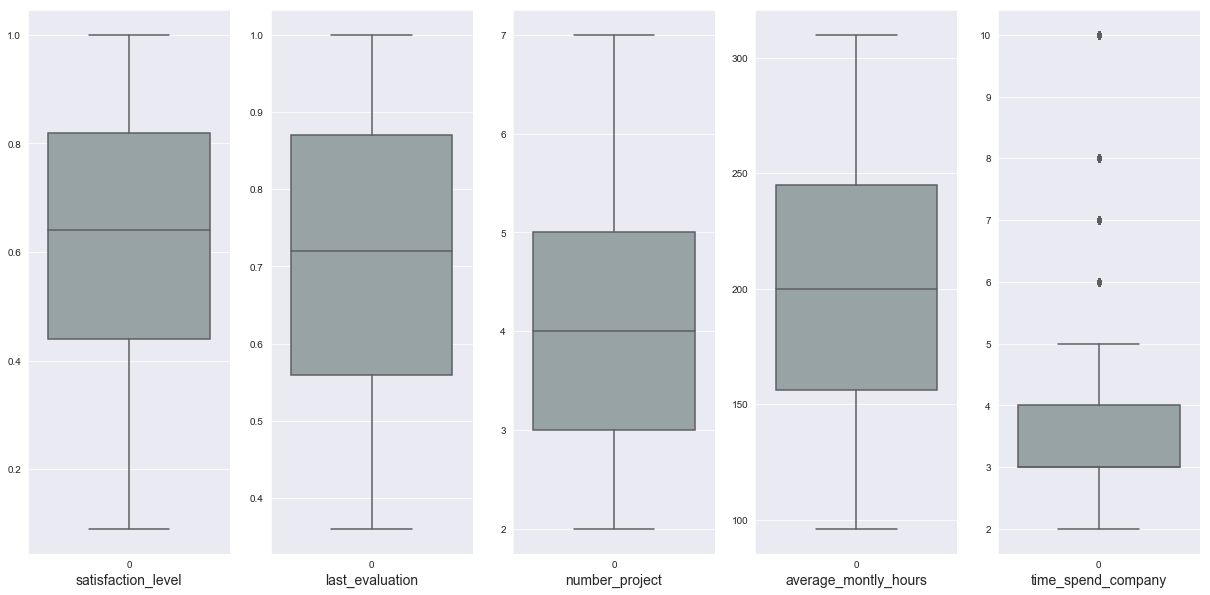

In [3]:
ColunaNumericas = (data._get_numeric_data()).columns.tolist() #coloca as colunas numéricas em uma lista

# removendo as colunas CATEGÓRICAS NUMÉRICAS
columns_drop = ['promotion_last_5years', 'Work_accident', 'left']

for column_name in columns_drop:
    ColunaNumericas.remove(column_name)

QtdTotalElementos = len(ColunaNumericas)

fig, axes = plt.subplots(1, QtdTotalElementos)
fig.set_figheight(10)
fig.set_figwidth(21)

sns.set_style("darkgrid")
flatui = ["#95a5a6",  "#34495e"]
for index, column_name in enumerate(ColunaNumericas):
    ax = sns.boxplot(data=data[column_name], orient='v', ax=axes[index], palette= flatui)
    ax.set_xlabel(xlabel=column_name, fontsize=14)

plt.show()

4.4.2. - Z-SCORE

Calcula a Z-SCORE de cada valor da amostra (coluna por coluna), considerando a fórmula (valor da posição - (média / desvio padrão)).

In [4]:
variables_original = {}
variables_zscore = {}
k = 0

for index, column_name in enumerate(ColunaNumericas):
    key = column_name
    
    # Criando o dicionário com os valores zscore calculado para cada instância
    value_zscore = stats.zscore(data[column_name])
    variables_zscore[key] = value_zscore
    
    # Criando o dicionário com os valores originais
    value_original = data[column_name]
    variables_original[key] = value_original

######################################################
list_original = list()
list_zscore = list()

# Criando Dataframes dos dicionários
df_original = pd.DataFrame(data=variables_original)
df_zscore = pd.DataFrame(data=variables_zscore)

# Renomeia as colunas do df_zscore
columns_to_rename = ["satisfaction_level_ZSCORE", "last_evaluation_ZSCORE", "number_project_ZSCORE", "average_montly_hours_ZSCORE", "time_spend_company_ZSCORE"]
df_zscore.columns = columns_to_rename

frames = [df_original, df_zscore]

# Concatenando os dicionários
df_new_zscore = pd.concat(frames, ignore_index=True, axis=1, sort=False)
columns_to_rename = ["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours", "time_spend_company", "satisfaction_level_ZSCORE", "last_evaluation_ZSCORE", "number_project_ZSCORE", "average_montly_hours_ZSCORE", "time_spend_company_ZSCORE"]
df_new_zscore.columns = columns_to_rename

df_new_zscore.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,satisfaction_level_ZSCORE,last_evaluation_ZSCORE,number_project_ZSCORE,average_montly_hours_ZSCORE,time_spend_company_ZSCORE
0,0.38,0.53,2,157,3,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235
1,0.80,0.86,5,262,6,0.752814,0.840707,0.971113,1.220423,1.713436
2,0.11,0.88,7,272,4,-2.022479,0.957554,2.593763,1.420657,0.343655
3,0.72,0.87,5,223,5,0.431041,0.899131,0.971113,0.439508,1.028546
4,0.37,0.52,2,159,3,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235


##### Como a única variável que teve valor de outlier foi a **"time_spend_company"**, iremos explorá-la melhor.

Será considerado os valores de Z-SCORE que sejam <= -3 OU >= +3.

--->>> Exibindo a frequência com que ocorre os valores fora da curva para a variável "time_spend_company"...


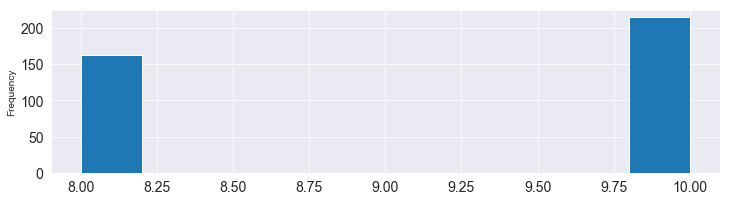

In [23]:
frames = ['time_spend_company', 'time_spend_company_ZSCORE']
df_new_zscore = pd.DataFrame(data=df_new_zscore, columns=frames)

val_negative = -3.0
val_positive = +3.0

print('--->>> Exibindo a frequência com que ocorre os valores fora da curva para a variável "time_spend_company"...')
df_new_zscore_MAIOR = df_new_zscore.loc[df_new_zscore['time_spend_company_ZSCORE'] >= val_positive]
df_new_zscore_MENOR = df_new_zscore.loc[df_new_zscore['time_spend_company_ZSCORE'] <= val_negative]

df_new_zscore_MAIOR_ = df_new_zscore_MAIOR['time_spend_company']
df_new_zscore_MENOR_ = df_new_zscore_MENOR['time_spend_company']

frames_ = [df_new_zscore_MAIOR_, df_new_zscore_MENOR_]

df_new_zscore_ = pd.concat(frames_, ignore_index=True, axis=0, sort=False)
df_new_zscore_.columns = ['time_spend_company']

df_new_zscore_.plot(kind='hist', grid=True, fontsize=14, sort_columns=True, figsize=(12, 3))

##### 4.5. Medidas de Posição

In [24]:
ColunaNumericas = (data._get_numeric_data()).columns.tolist() #coloca as colunas numéricas em uma lista

# removendo as colunas CATEGÓRICAS NUMÉRICAS
columns_drop = ['promotion_last_5years', 'Work_accident', 'left']

for column_name in columns_drop:
    ColunaNumericas.remove(column_name)

data_ = pd.DataFrame(data=data, columns=ColunaNumericas)

data_.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


##### 4.6. Acrescentando colunas CATEGÓRICAS com representação NUMÉRICA, com base nas possibilidades de valores das mesmas.
Técnica utilizada: LABEL ENCONDING  
df_in_pandas.cat.codes => https://pandas.pydata.org/pandas-docs/stable/categorical.html

Observação: essa função só funciona para variáveis categóricas. Se o o dtype reconhecido da coluna for um OBJECT, é necessário converter para CATEGORY.

In [4]:
# Convertendo coluna do tipo OBJECT para CATEGORY
data["sales"] = data["sales"].astype('category')
data["salary"] = data["salary"].astype('category')

# Convertendo os valores categóricos para numéricos
data["sales_CATEGORY"] = data["sales"].cat.codes
data["salary_CATEGORY"] = data["salary"].cat.codes

print("--->>> Tipagem das colunas do dataset após conversões:")
print(data.dtypes,'\n')

#################################################################
# Criando o dataset data_ com colunas numéricas

ColunaNumericas = (data._get_numeric_data()).columns.tolist() #coloca as colunas numéricas em uma lista

# removendo as colunas CATEGÓRICAS NUMÉRICAS
columns_drop = ['promotion_last_5years', 'Work_accident', 'left']

for column_name in columns_drop:
    ColunaNumericas.remove(column_name)

data_ = pd.DataFrame(data=data, columns=ColunaNumericas)

print("--->>> Primeiras 5 linhas do dataset alterado já considerando o incrementa das colunas CATEGÓRICAS em formato NUMÉRICO...")
data.head(5)

--->>> Tipagem das colunas do dataset após conversões:
satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_montly_hours        int64
time_spend_company          int64
Work_accident               int64
left                        int64
promotion_last_5years       int64
sales                    category
salary                   category
sales_CATEGORY               int8
salary_CATEGORY              int8
dtype: object 

--->>> Primeiras 5 linhas do dataset alterado já considerando o incrementa das colunas CATEGÓRICAS em formato NUMÉRICO...


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,sales_CATEGORY,salary_CATEGORY
0,0.38,0.53,2,157,3,0,1,0,sales,low,7,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,7,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,7,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,7,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,7,1


##### 4.7. Simetria
Skew (ou simetria) se refere a distribuição dos dados que é assumida ser normal ou gaussiana (bell curve). Valores perto de zero mostram menos simetria.

--->>> Simetria dos valores das colunas:

satisfaction_level     -0.476360
last_evaluation        -0.026622
number_project          0.337706
average_montly_hours    0.052842
time_spend_company      1.853319
sales_CATEGORY         -0.833084
salary_CATEGORY        -0.418758
dtype: float64


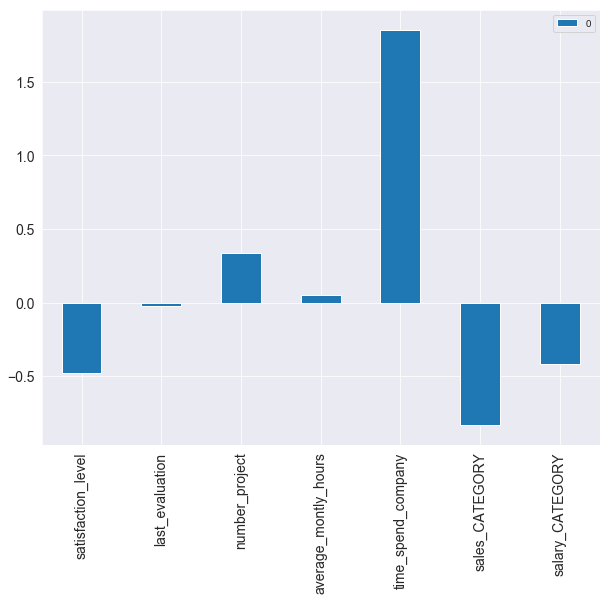

In [26]:
df_skew = pd.DataFrame(data=data_.skew(axis=0))

print('--->>> Simetria dos valores das colunas:\n')
print(data_.skew(axis=0))
df_skew.plot(kind='bar', grid=True, fontsize=14, sort_columns=True, figsize=(10, 8))

##### 4.8. Distribuição de Frequência das Variáveis

###### Legenda para as variáveis categóricas transformadas em numéricas

In [27]:
frame_salary = [ data['salary'].unique(), data['salary_CATEGORY'].unique()]
frame_sales = [data['sales'].unique(), data['sales_CATEGORY'].unique()]


df_salary = pd.DataFrame(frame_salary, columns=['salary', 'salary_CATEGORY']).sort_values(by=['salary'], ascending=False)
df_sales = pd.DataFrame(frame_sales, columns=['sales', 'sales_CATEGORY']).sort_values(by=['sales_CATEGORY'], ascending=False)
df_salary

,salary,salary_CATEGORY
2,high,0
1,medium,2
0,low,1


In [12]:
df_sales

,sales,sales_CATEGORY
3,technical,9
4,support,8
0,sales,7
7,product_mng,6
8,marketing,5
5,management,4
2,hr,3
1,accounting,2
9,RandD,1
6,IT,0


--->>> Gráficos de Distribuição de Frequência das Variáveis


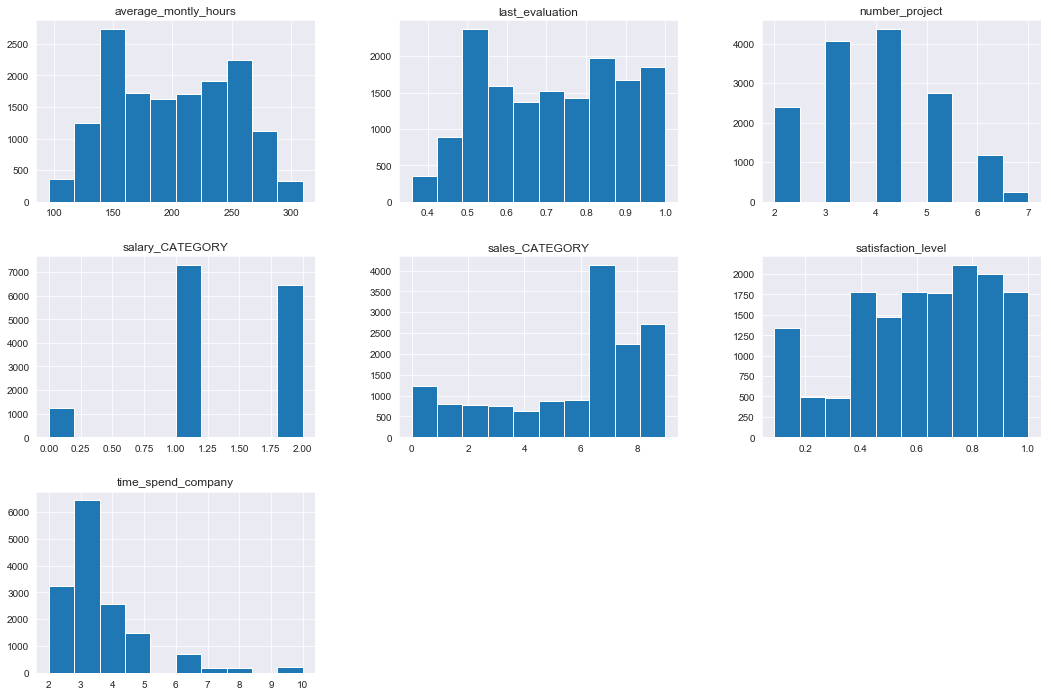

In [28]:
print('--->>> Gráficos de Distribuição de Frequência das Variáveis')

data_.hist(sharex=False, sharey=False, figsize=(18,12), grid=True)
plt.show()

##### 4.9. Correlação entre as variáveis

In [46]:
data_.corr(method='pearson')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,sales_CATEGORY,salary_CATEGORY
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.003153,0.011754
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,0.007772,0.013965
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,0.009268,0.009672
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,0.003913,0.007082
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,-0.018010,-0.003086
sales_CATEGORY,0.003153,0.007772,0.009268,0.003913,-0.018010,1.000000,0.000685
salary_CATEGORY,0.011754,0.013965,0.009672,0.007082,-0.003086,0.000685,1.000000


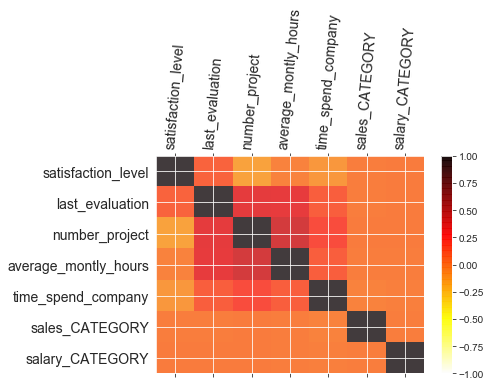

In [66]:
#variável values_corr aramzena a matriz de correlação tabular
ColunaNumericas = data_.columns.tolist() #coloca as colunas numéricas em uma lista
QtdTotalElementos = len(ColunaNumericas)

values_corr = data_.corr() #coloca a matrix de correlação tabular em um objeto "values_corr"

fig = plt.figure() #montando o gráfico
ax = fig.add_subplot(1,1,1) #divisão da figura: qtd. linhas, qtd. colunas, posição
correlation_matrix = ax.matshow(values_corr
                                ,vmin = -1
                                ,vmax = 1
                                ,interpolation = 'none'
                                ,cmap = 'hot_r' #'hot_r', 'pink_r', 'spring', 'spring_r'
                                ,aspect='auto'
                                ,alpha = 0.75
                                #,origin = 'upper'
                               ) #matshow -> plota um array ou matriz como uma imagem

fig.colorbar(correlation_matrix) #barra de cores que indica a "temperatura"

ticks = np.arange(0, QtdTotalElementos, 1) #range da escala de valores. Sabendo que os valores de Corr ficam entre -1 e 1.
ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_xticklabels(labels=ColunaNumericas, rotation=85, fontsize=14)
ax.set_yticklabels(labels=ColunaNumericas, fontsize=14)
plt.show()

##### 4.10. Análise bi-variada entre as variáveis que mais se correlacionaram - Scatterplot

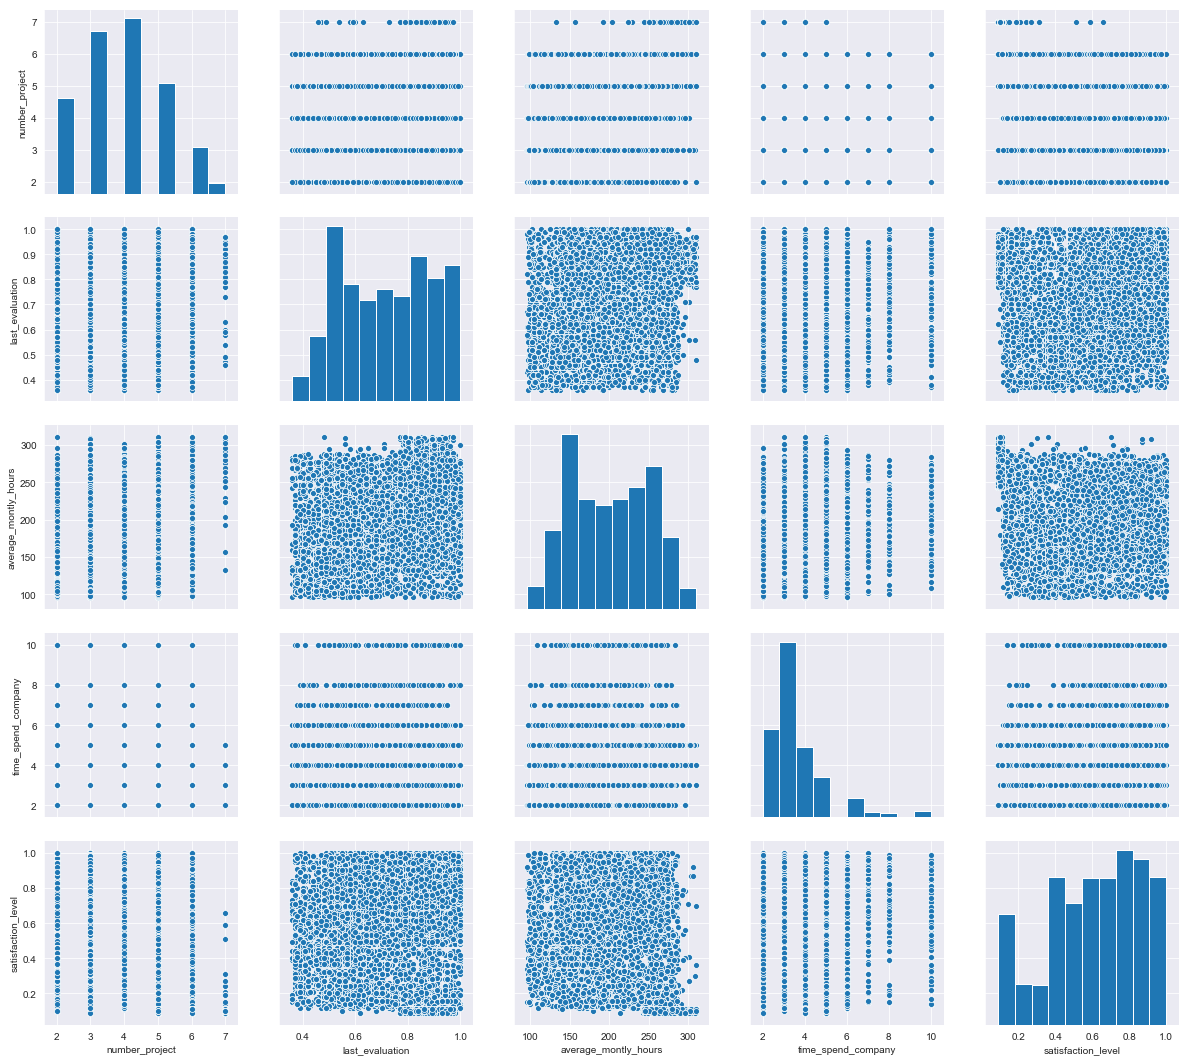

In [119]:
columns = ["number_project", "last_evaluation", "average_montly_hours", "time_spend_company", "satisfaction_level"]
df_bivariate = pd.DataFrame(data = data_, columns = columns)

g = sns.pairplot(data=df_bivariate)
g.fig.set_size_inches(17, 15)

##### 4.10. Explorando as hipóteses levantadas

Como iremos explorar as variáções em relação a variável **left**, que representa a **Situação do Empregado (0 = Ativo, 1 = Evadiu/Desligado)**, será criada uma nova variável categórica para representar a legenda dessa informação.

In [66]:
print("Possibilidade de valores para a variável (left):", data["left"].unique())

data['left_CATEGORY'] = np.where(data['left']==0, 'Ativo', 'Evadiu/Desligado')
data.head(10)

Possibilidade de valores para a variável (left): [1 0]


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,sales_CATEGORY,salary_CATEGORY,left_CATEGORY
0,0.38,0.53,2,157,3,0,1,0,sales,low,7,1,Evadiu/Desligado
1,0.80,0.86,5,262,6,0,1,0,sales,medium,7,2,Evadiu/Desligado
2,0.11,0.88,7,272,4,0,1,0,sales,medium,7,2,Evadiu/Desligado
3,0.72,0.87,5,223,5,0,1,0,sales,low,7,1,Evadiu/Desligado
4,0.37,0.52,2,159,3,0,1,0,sales,low,7,1,Evadiu/Desligado
5,0.41,0.50,2,153,3,0,1,0,sales,low,7,1,Evadiu/Desligado
6,0.10,0.77,6,247,4,0,1,0,sales,low,7,1,Evadiu/Desligado
7,0.92,0.85,5,259,5,0,1,0,sales,low,7,1,Evadiu/Desligado
8,0.89,1.00,5,224,5,0,1,0,sales,low,7,1,Evadiu/Desligado
9,0.42,0.53,2,142,3,0,1,0,sales,low,7,1,Evadiu/Desligado


##### I. O nível de satisfação do funcionário, assim como a última avaliação de performance obtida, possui relação positiva com a situação do funcionário ativo?

R.: Observa-se que a grande maioria dos funcionários que continuam na empresa são aqueles que tem os maiores níveis de satisfação relacionados positivamente às melhores avaliações de performance. Casos raros são aqueles que evadiram o emprego nessa condição indicada.

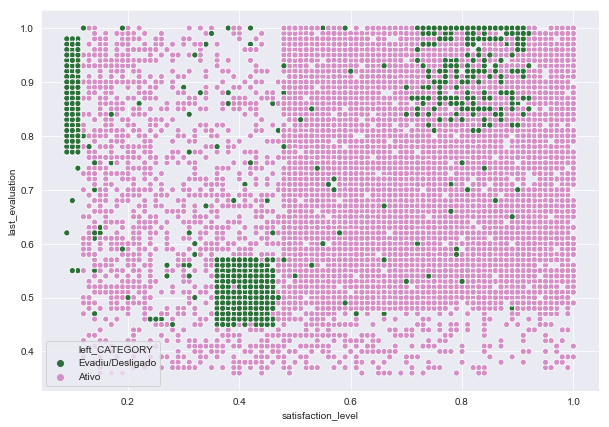

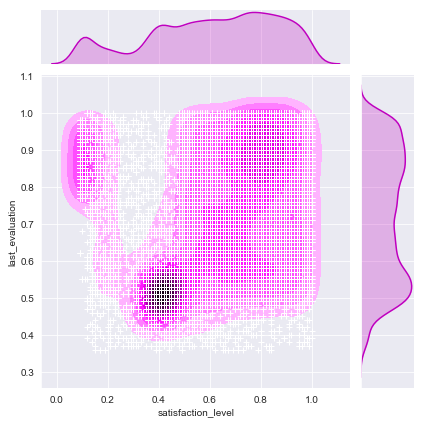

In [93]:
df_comp1 = data[['satisfaction_level', 'last_evaluation', 'left_CATEGORY']]

fig, axes = plt.subplots(1,1)
fig.set_figheight(7)
fig.set_figwidth(10)

sns.scatterplot(data=df_comp1, x='satisfaction_level',y='last_evaluation', hue="left_CATEGORY", palette='cubehelix') # 'cubehelix', Set2', 'Paired'

g = sns.jointplot(data=df_comp1, x='satisfaction_level',y='last_evaluation', kind = "kde", color = "m")
g.plot_joint(plt.scatter, c = "white", s = 30, linewidth = 1, marker = "+")
g.ax_joint.collections[0].set_alpha(0)

plt.show()

##### II. Os funcionários com os maiores salários (salary = HIGH), tem bons níveis (>=0,75) de satisfação em relação ao seu emprego? E os com salários mais baixos?

R.: Há uma quantidade significativa de funcionários onde o nível de satisfação se encontra na faixa de 0,5 - 1 com altos salário.

O mesmo não se pode dizer de funcionário que tem baixo salário. Há uma quantidade significativa de funcionários (~+500) insatisfeitos com a atual empregabilidade que recebem salários menores. Apesar disso, há um número expressivo de funcionário que recebem salários menores onde o nível de satisfação está na faixa de 0,6 - 1,0, o que inclina que salário não é um fator decisivo no nível de satisfação da grande maioria dos funcionários do grupo dos que recebem menos.

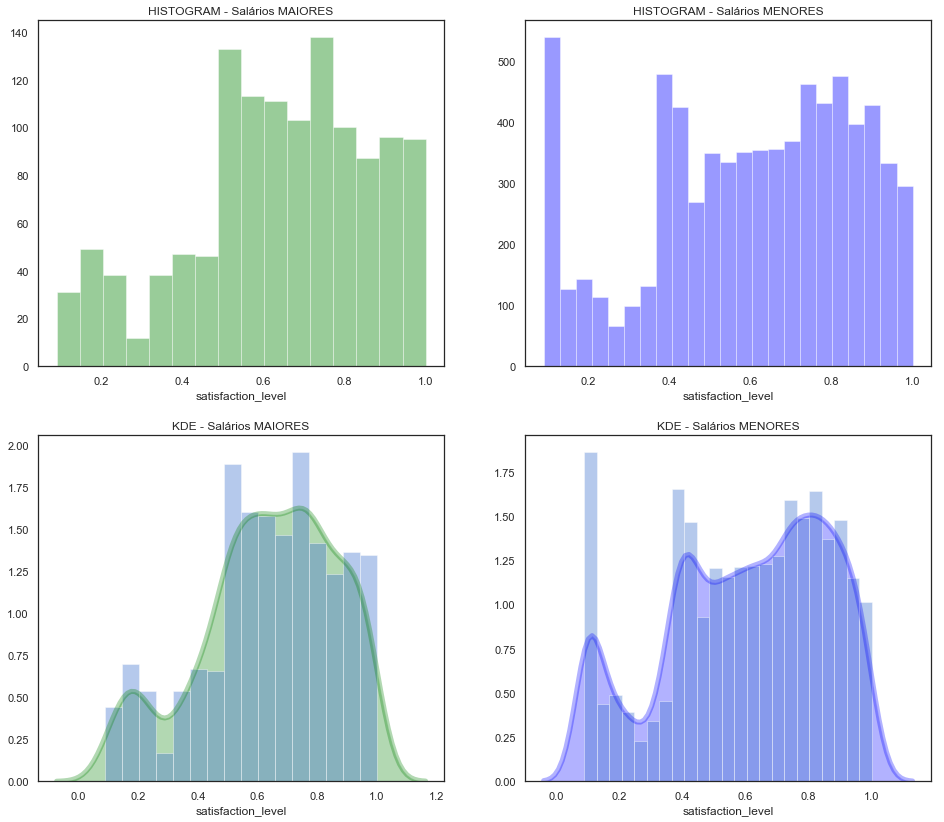

In [275]:
df_comp2 = data[['satisfaction_level', 'salary']]
df_comp2 = df_comp2[df_comp2['salary'] == 'high']

df_comp3 = data[['satisfaction_level', 'salary']]
df_comp3 = df_comp3[df_comp3['salary'] == 'low']

fig, axes = plt.subplots(2, 2)
fig.set_figheight(14)
fig.set_figwidth(16)

sns.distplot(df_comp2['satisfaction_level'], ax=axes[0, 0], kde=False, hist_kws={"color": "green"})
sns.distplot(df_comp3['satisfaction_level'], ax=axes[0, 1], kde=False, hist_kws={"color": "blue"})

sns.distplot(a=df_comp2['satisfaction_level'], ax=axes[1, 0], kde=True, kde_kws={"color": "green", "alpha":0.3, "linewidth": 5, "shade":True})
sns.distplot(a=df_comp3['satisfaction_level'], ax=axes[1, 1], kde=True, kde_kws={"color": "blue", "alpha":0.3, "linewidth": 5, "shade":True})

axes[0, 0].set_title(label='HISTOGRAM - Salários MAIORES')
axes[0, 1].set_title(label='HISTOGRAM - Salários MENORES')
axes[1, 0].set_title(label='KDE - Salários MAIORES')
axes[1, 1].set_title(label='KDE - Salários MENORES')
plt.show()

##### III. Os funcionários que tem um volume de horas mensal de trabalho acima da média da população, estão com bons níveis (>=0,75) em relação a sua última avaliação de performance? Qual a relação destes dois indicadores com a evasão dos funcionários?

R.: Observa-se que a grande maioria dos funcionários com um volume mensal de horas muito acima a média (+ 275 horas), acabram evadindo seus empregos, apesar de suas boas avaliações de performance (> 0,75).

No geral, funcionários que trabalharam um volume de horas acima da média (> 200 horas) e tinham boas avaliações de performance (> 0,75), evadiram o seus empregos.

Assim como, funcionários que trabalharam um volume de horas acima da média (> 200 horas) e tinham avaliações de performance < 0,75), continuaram em seus empregos.

--->>> Média do volume de horas mensal trabalhado da população do dataset: 201.05


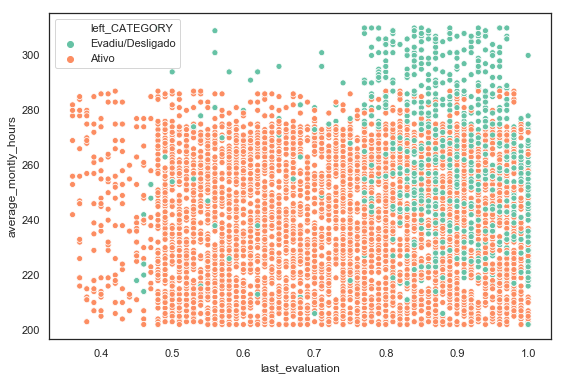

In [285]:
df_comp4 = data[['average_montly_hours', 'last_evaluation', 'left_CATEGORY']]
population_mean_average_montly_hours = df_comp4['average_montly_hours'].mean()

print('--->>> Média do volume de horas mensal trabalhado da população do dataset: %.2f' % population_mean_average_montly_hours)

df_comp4 = df_comp4[df_comp4['average_montly_hours'] > population_mean_average_montly_hours]

fig, axes = plt.subplots(1, 1)
fig.set_figheight(6)
fig.set_figwidth(9)

sns.scatterplot(data=df_comp4, x='last_evaluation',y='average_montly_hours', hue="left_CATEGORY", palette='Set2') # 'cubehelix', Set2', 'Paired'

plt.show()

##### IV. O nível de satisfação do funcionário, tem forte correlação com a última avaliação de performance?

R.: O nível de satisfação do funcionário tem relação quase neutra (0.105021) com a avaliação de performance.

Na média, os funcionários que tiveram avaliação de performance entre 0,6 e 0,75, continuaram nos seus atuais empregos. O mesmo não se pode falar do nível de satisfação, onde os funcionários que evadiram seus empregos, tiveram notas entre oscilando entre 0,4 e 0,9, o que não explica muita coisa.

--->>> Correlação entre as variáveis "satisfaction_level" e "last_evaluation":
                    satisfaction_level  last_evaluation
satisfaction_level            1.000000         0.105021
last_evaluation               0.105021         1.000000


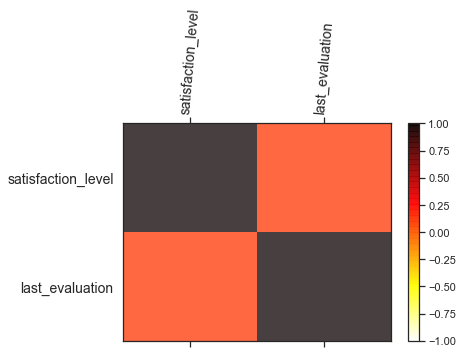

In [322]:
df_comp5 = data[['satisfaction_level', 'last_evaluation', 'left_CATEGORY']]

print('--->>> Correlação entre as variáveis "satisfaction_level" e "last_evaluation":')
print(df_comp5.corr(method='pearson'))

#variável values_corr aramzena a matriz de correlação tabular
ColunaNumericas = ['satisfaction_level', 'last_evaluation'] #coloca as colunas numéricas em uma lista
QtdTotalElementos = len(ColunaNumericas)

values_corr = df_comp5.corr() #coloca a matrix de correlação tabular em um objeto "values_corr"

fig = plt.figure() #montando o gráfico
ax = fig.add_subplot(1,1,1) #divisão da figura: qtd. linhas, qtd. colunas, posição
correlation_matrix = ax.matshow(values_corr
                                ,vmin = -1
                                ,vmax = 1
                                ,interpolation = 'none'
                                ,cmap = 'hot_r' #'hot_r', 'pink_r', 'spring', 'spring_r'
                                ,aspect='auto'
                                ,alpha = 0.75
                                #,origin = 'upper'
                               ) #matshow -> plota um array ou matriz como uma imagem

fig.colorbar(correlation_matrix) #barra de cores que indica a "temperatura"

ticks = np.arange(0, QtdTotalElementos, 1) #range da escala de valores. Sabendo que os valores de Corr ficam entre -1 e 1.
ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_xticklabels(labels=ColunaNumericas, rotation=85, fontsize=14)
ax.set_yticklabels(labels=ColunaNumericas, fontsize=14)
plt.show()

--->>> A relação das variáveis "satisfaction_level" e "last_evaluation" com o fato do funcionário evadir ou permanecer na empresa:


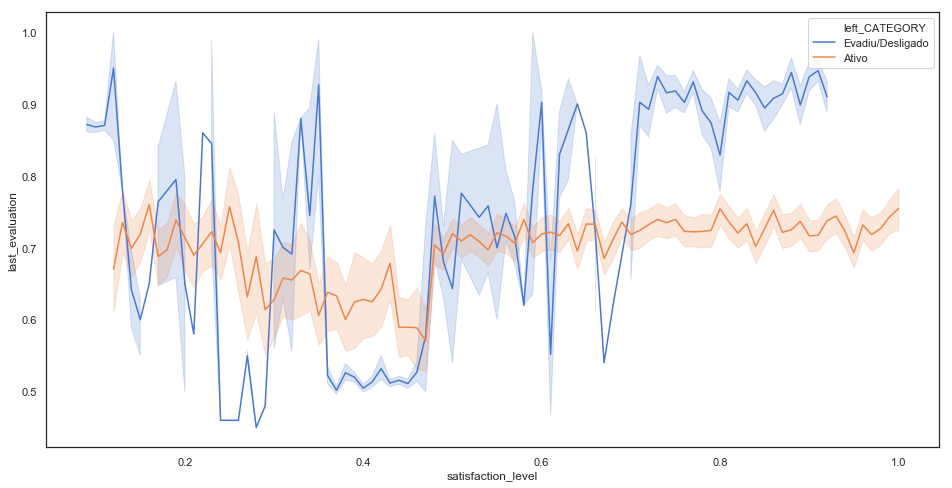

In [323]:
print('--->>> A relação das variáveis "satisfaction_level" e "last_evaluation" com o fato do funcionário evadir ou permanecer na empresa:')

fig, axes = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)

sns.lineplot(data=df_comp5, x='satisfaction_level',y='last_evaluation', hue='left_CATEGORY', color="coral")

plt.show()

## 5. MACHINE LEARNING

Identificando o(s) grupo(s) de funcionários que evadiram de seus empregos.

##### 5.0. Importação das Bibliotecas

In [440]:
from sklearn.pipeline import Pipeline
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns

##### 5.1. Carregamento dos dados

In [137]:
# Importando Dataset
file = "C:\\temp\\HR_comma_sep.csv"
data_df = pd.read_csv(filepath_or_buffer=file, header=0, sep=',')

# Convertendo coluna do tipo OBJECT para CATEGORY
data_df["sales"] = data_df["sales"].astype('category')
data_df["salary"] = data_df["salary"].astype('category')

# Convertendo os valores categóricos para numéricos
data_df["sales_CATEGORY"] = data_df["sales"].cat.codes
data_df["salary_CATEGORY"] = data_df["salary"].cat.codes

# Selecionando apenas as colunas numéricas
ColunaNumericas = (data_df._get_numeric_data()).columns.tolist() #coloca as colunas numéricas em uma lista
data_df = pd.DataFrame(data=data_df, columns=ColunaNumericas)

# Selecionando apenas os funcionários que evadiram o emprego
data_df = data_df[data_df["left"]==1]

data_df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_CATEGORY,salary_CATEGORY
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


##### 5.2. Identificação e ajuste de valores missing
Técnica utilizada: exclusão

In [140]:
data_df = data_df.iloc[0:, 0:].dropna()

##### 5.3. Divisão de dados em treino e teste
Técnica utilizada: cross validation

In [173]:
data_array = data_df.values

test_size = 0.25
df_train, df_test = model_selection.train_test_split(data_array, test_size = test_size)

print('---> Dados de TREINO (em um array) <---')
print(df_train)
print('\n')
print('---> Dados de TESTE (em um array) <---')
print(df_test)

---> Dados de TREINO (em um array) <---
[[0.38 0.46 2.   ... 0.   8.   1.  ]
 [0.39 0.5  2.   ... 0.   8.   1.  ]
 [0.39 0.57 2.   ... 0.   7.   1.  ]
 ...
 [0.39 0.57 2.   ... 0.   2.   2.  ]
 [0.76 0.92 4.   ... 0.   7.   1.  ]
 [0.11 0.9  6.   ... 0.   7.   2.  ]]


---> Dados de TESTE (em um array) <---
[[0.79 0.58 3.   ... 0.   3.   1.  ]
 [0.46 0.49 2.   ... 0.   8.   1.  ]
 [0.42 0.47 2.   ... 0.   7.   1.  ]
 ...
 [0.45 0.47 2.   ... 0.   7.   1.  ]
 [0.4  0.53 2.   ... 0.   6.   2.  ]
 [0.1  0.91 6.   ... 0.   7.   2.  ]]


##### 5.4. Redução da dimensionalidade (dados de treino)
Técnica utilizada: PCA (Principal Component Analysis)

Quantidade de componentes: 2

In [175]:
var_PCA = PCA(n_components = 2).fit_transform(df_train)
print('---> Dados do dataset de TREINO após a redução da dimensionalidade <---')
print(var_PCA)

---> Dados do dataset de TREINO após a redução da dimensionalidade <---
[[-46.69088347  -1.96740258]
 [-71.6807554   -1.96666825]
 [-79.67723942  -0.96660605]
 ...
 [-61.68359738   4.04489052]
 [ 39.34918981  -0.99216927]
 [ 46.38859607  -0.96404234]]


##### 5.5. Identificação da quantidade ideal de clusters
Técnica utilizada: método de Elbow (cotovelo)

A homogeneidade aumenta a medida que adicionamos novos aglomerados. A heterogeneidade também continuará a diminuir com mais clusters. Esse método não tem como objetivo maximizar a homogeneidade e minimizar a heterogeneidade, e sim encontrar o ponto decrescente onde a variância dos dados em relação ao número de clusters não seja significativo.

Cluster 1 | Inertia Value: 10094651
Cluster 2 | Inertia Value: 1066591
Cluster 3 | Inertia Value: 497609
Cluster 4 | Inertia Value: 331159
Cluster 5 | Inertia Value: 220167
Cluster 6 | Inertia Value: 156487
Cluster 7 | Inertia Value: 125907
Cluster 8 | Inertia Value: 100114
Cluster 9 | Inertia Value: 81633
Cluster 10 | Inertia Value: 68700
Cluster 11 | Inertia Value: 62346


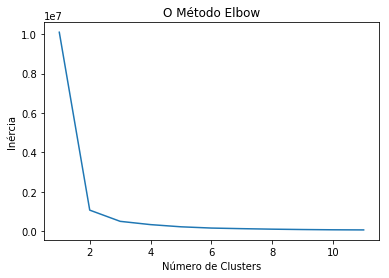

In [196]:
wcss = []

max_iter = 5000
init = 'k-means++' # 'random' 'k-means++'

for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = init, max_iter = max_iter)
    kmeans.fit(X = var_PCA)
    print('Cluster %s | Inertia Value: %d' % (i, kmeans.inertia_))
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 12), wcss)
plt.title('O Método Elbow')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()

**Inércia**: soma das distâncias das amostras para o seu centro de agrupamento mais próximo.

Observa-se, no gráfico acima, que conforme aumenta-se o número de K (clusters), o valor da inércia vai diminuindo, o que significa que as instâncias estão mais homogêneas, ou seja, mais próximas do centróide.

Logo, o melhor ajuste de K para o dataset em questão, é 4.

##### 5.6. Obtendo as áreas dos plots

Através de Células de Voronoi

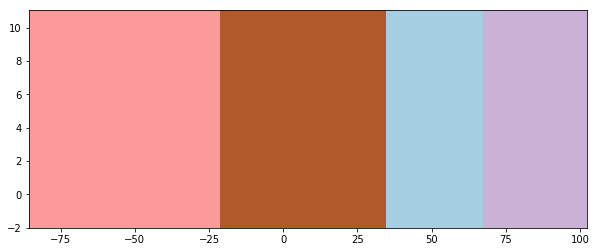

In [216]:
# Obtém os valores mínimos e máximos e organiza o shape
x_min, x_max = var_PCA[:, 0].min() - 5, var_PCA[:, 0].max() - 1
y_min, y_max = var_PCA[:, 1].min() + 1, var_PCA[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = k_means.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot das áreas dos clusters
plt.figure(1)
plt.clf()
plt.imshow(Z, 
           interpolation = 'nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Paired,
           aspect = 'auto', 
           origin = 'lower')

##### 5.7. Plot das diferenças nos clusters de acordo com os valores de K

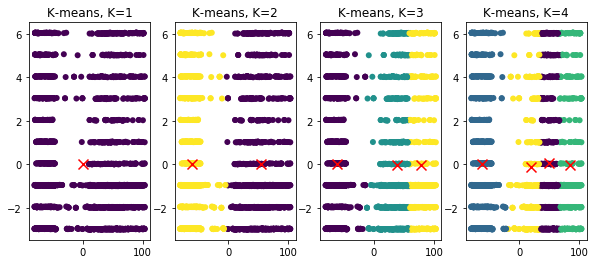

In [240]:
pl.rcParams['figure.figsize'] = (10.0, 4.0)

for K in [1, 2, 3, 4]:
    cls = KMeans(n_clusters = K)
    y_pred = cls.fit_predict(var_PCA)
    
    kl = (1 if K==1 else K)
    
    plt.subplot(1, 4, kl) #  nrows, ncols, and index
    plt.title("K-means, K=%s" % K)
    plt.scatter(var_PCA[:, 0], var_PCA[:, 1], c = y_pred, edgecolors = 'none')
    plt.scatter(cls.cluster_centers_[:,0], cls.cluster_centers_[:,1], marker = 'x', color = 'r', s = 100, linewidths = 4)

plt.show()

##### 5.8. Construção do modelo (sobre os dados reduzidos da PCA), indicando a quantidade ideal de cluster descoberta no passo anterior

In [244]:
n_clusters = 4
max_iter = 5000
init = 'k-means++' # 'random' 'k-means++'

k_means = KMeans(n_clusters=n_clusters, max_iter = max_iter, init = init)
k_means.fit(X=var_PCA)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=5000,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

##### 5.9. Plotando os resultados com as labels

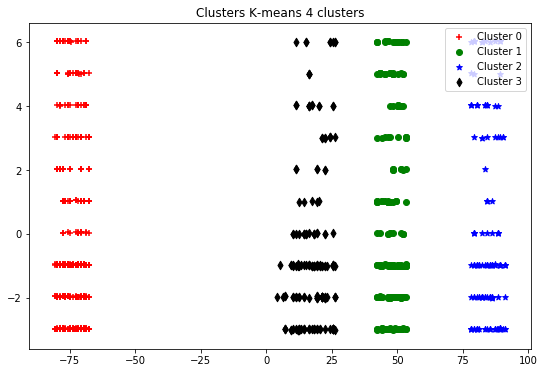

In [191]:
# Gerando "labels" para os resultados dos clusters
pl.rcParams['figure.figsize'] = 9, 6

for i in range(0, var_PCA.shape[0]):
    if kmeans.labels_[i] == 0:
        c1 = pl.scatter(var_PCA[i,0],var_PCA[i,1],c='red', marker='+')
    elif kmeans.labels_[i] == 1:
        c2 = pl.scatter(var_PCA[i,0],var_PCA[i,1],c='green', marker='o')
    elif kmeans.labels_[i] == 2:
        c3 = pl.scatter(var_PCA[i,0],var_PCA[i,1],c='blue', marker='*')
    elif kmeans.labels_[i] == 3:
        c4 = pl.scatter(var_PCA[i,0],var_PCA[i,1],c='black', marker='d')

        pl.legend([c1, c2, c3, c4], ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'], loc='upper right')
        pl.title('Clusters K-means 4 clusters')
pl.show()

##### 5.10. Interpretando os Resultados

In [604]:
# Regerando os modelo porém sem PCA
n_clusters = 4
max_iter = 5000
init = 'k-means++' # 'random' 'k-means++'

k_means = KMeans(n_clusters=n_clusters, max_iter = max_iter, init = init)
k_means.fit(X=data_array)

# Adicionando a coluna de LABEL do CLUSTER da instância ao array classificado
df_clustering = np.column_stack((data_array, k_means.labels_))

# Recriando o Dataframe em Pandas
columns = ["satisfaction_level","last_evaluation","number_project","average_montly_hours","time_spend_company","Work_accident","left","promotion_last_5years","sales_CATEGORY","salary_CATEGORY", "Cluster"]
df_clustering_ = pd.DataFrame(data = df_clustering, columns = columns)
df_clustering_ = df_clustering_.drop(labels=['left'], axis=1)

# Convertendo coluna do tipo OBJECT para CATEGORY
df_clustering_["sales_CATEGORY"] = df_clustering_["sales_CATEGORY"].astype('category')
df_clustering_["salary_CATEGORY"] = df_clustering_["salary_CATEGORY"].astype('category')

# Adicionando coluna categórica descritiva SALARY
df_clustering_["salary"] = df_clustering_["salary_CATEGORY"].apply(lambda x : 'high' if x==0 else 'medium' if x==2 else 'low')

# Adicionando coluna categórica descritiva SALES
conditions = [ (df_clustering_['sales_CATEGORY'] == 9)
              ,(df_clustering_['sales_CATEGORY'] == 8)
              ,(df_clustering_['sales_CATEGORY'] == 7)
              ,(df_clustering_['sales_CATEGORY'] == 6)
              ,(df_clustering_['sales_CATEGORY'] == 5)
              ,(df_clustering_['sales_CATEGORY'] == 4)
              ,(df_clustering_['sales_CATEGORY'] == 3)
              ,(df_clustering_['sales_CATEGORY'] == 2)
              ,(df_clustering_['sales_CATEGORY'] == 1)
              ,(df_clustering_['sales_CATEGORY'] == 0)]
choices = ['technical', 'support', 'sales', 'product_mgnt', 'marketing', 'management', 'human_rs', 'accounting', 'RandD', 'IT', ]
df_clustering_['sales'] = np.select(conditions, choices, default='Undefined')

# Removendo colunas categóricas numéricas
df_clustering_ = df_clustering_.drop(labels=['salary_CATEGORY'], axis=1)
df_clustering_ = df_clustering_.drop(labels=['sales_CATEGORY'], axis=1)

# Mudando o type das coluna abaixo de float para category
df_clustering_["Work_accident"] = df_clustering_["Work_accident"].astype('category')
df_clustering_["promotion_last_5years"] = df_clustering_["promotion_last_5years"].astype('category')
df_clustering_["Cluster"] = df_clustering_["Cluster"].astype('category')

# Separando os dataframes de cada CLUSTER
df_cluster_00 = df_clustering_[df_clustering_["Cluster"]==0]
df_cluster_00 = df_cluster_00.drop(labels=['Cluster'], axis=1)

df_cluster_01 = df_clustering_[df_clustering_["Cluster"]==1]
df_cluster_01 = df_cluster_01.drop(labels=['Cluster'], axis=1)

df_cluster_02 = df_clustering_[df_clustering_["Cluster"]==2]
df_cluster_02 = df_cluster_02.drop(labels=['Cluster'], axis=1)

df_cluster_03 = df_clustering_[df_clustering_["Cluster"]==3]
df_cluster_03 = df_cluster_03.drop(labels=['Cluster'], axis=1)

##### Abaixo é apresentado o sumário de cada um dos grupos, com o intuito de entender o padrão de cada um deles

##### --->>> CLUSTER 00 <<<---

In [605]:
print('---> Sumário do CLUSTER 00 <---')
df_cluster_00.describe()

---> Sumário do CLUSTER 00 <---


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,863.000000,863.000000,863.000000,863.000000,863.000000
mean,0.495643,0.882677,5.187717,260.374276,4.622248
std,0.354129,0.096585,1.074698,8.614731,0.756145
min,0.090000,0.470000,2.000000,246.000000,2.000000
25%,0.100000,0.840000,4.000000,254.000000,4.000000
50%,0.720000,0.890000,5.000000,260.000000,5.000000
75%,0.830000,0.950000,6.000000,267.000000,5.000000
max,0.920000,1.000000,7.000000,276.000000,6.000000


In [606]:
salary = df_cluster_00.groupby('salary')
salary.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
salary,,,,,
high,0.696154,0.811538,4.538462,259.076923,4.846154
low,0.499430,0.882633,5.141454,260.573674,4.652259
medium,0.482346,0.885455,5.281525,260.126100,4.568915


Quantidade de evasões por categoria de salário
salary
high       13
low       509
medium    341
dtype: int64


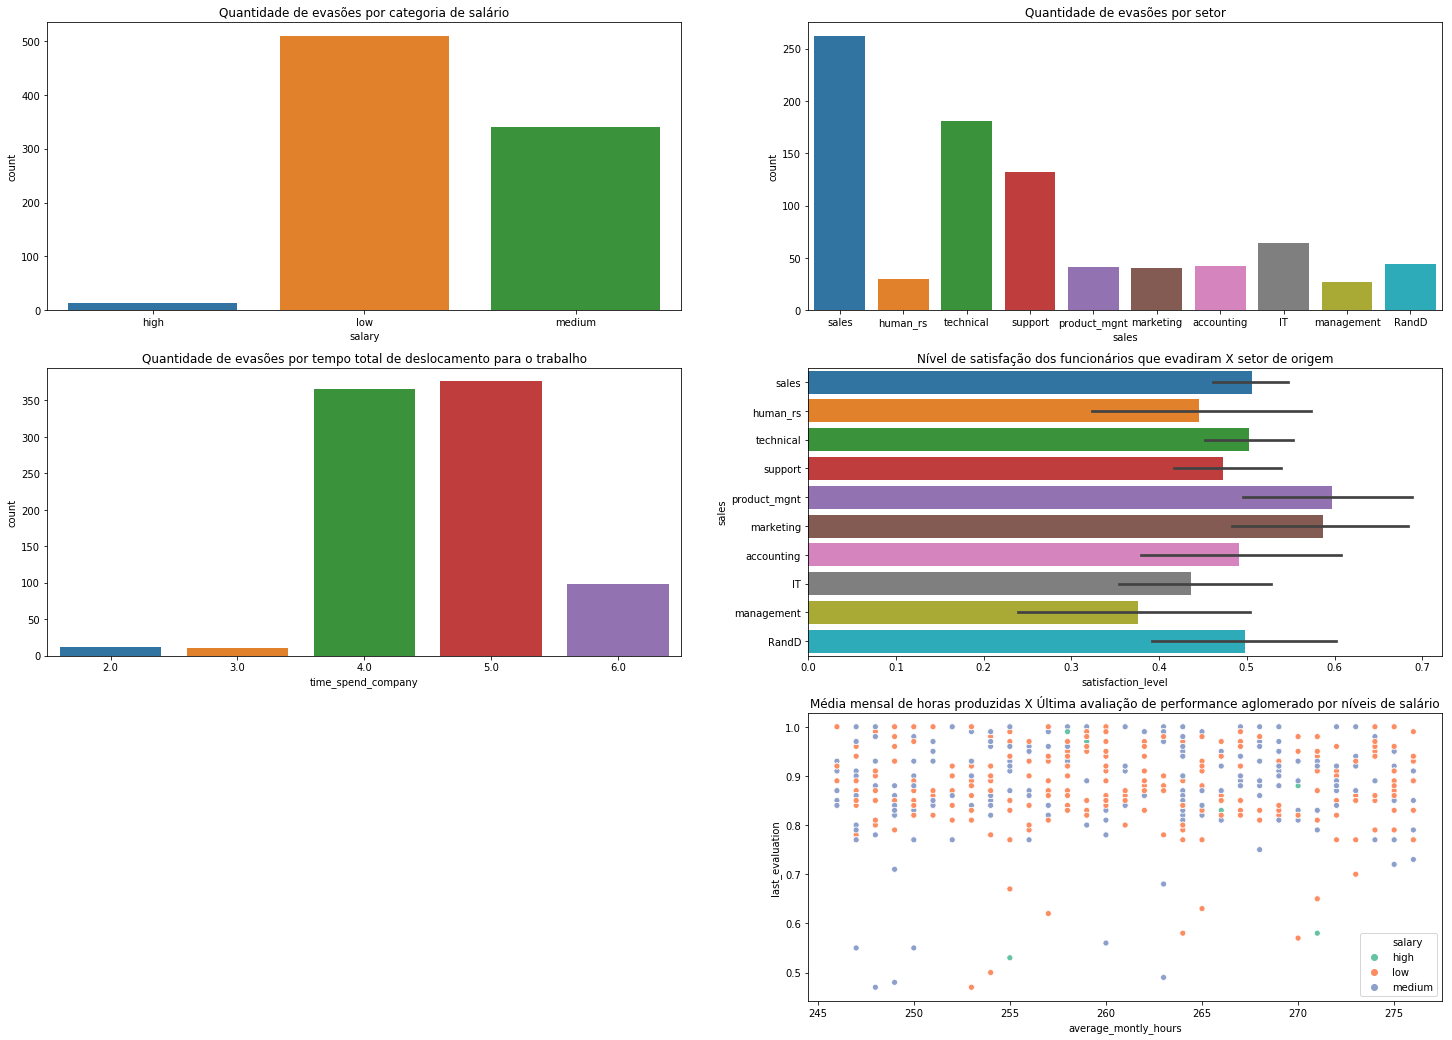

In [607]:
print('Quantidade de evasões por categoria de salário')
print(df_cluster_00.groupby(['salary']).size())

fig = plt.figure()
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,6)

fig.set_figheight(18)
fig.set_figwidth(25)

sns.countplot(data=df_cluster_00, x='salary', ax=ax1)
sns.countplot(data=df_cluster_00, x='sales', ax=ax2)
sns.countplot(data=df_cluster_00, x='time_spend_company', ax=ax3)
sns.barplot(data=df_cluster_00, x='satisfaction_level', y='sales', orient='h', ax=ax4)
sns.scatterplot(data=df_cluster_00, x='average_montly_hours',y='last_evaluation', hue='salary', palette='Set2', ax=ax5) # 'cubehelix', Set2', 'Paired'

ax1.set_title(label='Quantidade de evasões por categoria de salário')
ax2.set_title(label='Quantidade de evasões por setor')
ax3.set_title(label='Quantidade de evasões por tempo total de deslocamento para o trabalho')
ax4.set_title(label='Nível de satisfação dos funcionários que evadiram X setor de origem')
ax5.set_title(label='Média mensal de horas produzidas X Última avaliação de performance aglomerado por níveis de salário')

plt.show()

##### --->>> CLUSTER 01 <<<---

In [608]:
print('---> Sumário do CLUSTER 01 <---')
df_cluster_01.describe()

---> Sumário do CLUSTER 01 <---


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000
mean,0.416510,0.528973,2.161369,144.578851,3.070905
std,0.076906,0.084823,0.689546,11.178639,0.406202
min,0.100000,0.450000,2.000000,126.000000,2.000000
25%,0.380000,0.480000,2.000000,135.000000,3.000000
50%,0.410000,0.510000,2.000000,145.000000,3.000000
75%,0.440000,0.550000,2.000000,154.000000,3.000000
max,0.900000,1.000000,7.000000,184.000000,6.000000


In [609]:
salary = df_cluster_01.groupby('salary')
salary.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
salary,,,,,
high,0.426600,0.513200,2.260000,145.960000,3.140000
low,0.414669,0.532142,2.173741,144.697927,3.075025
medium,0.418883,0.524747,2.130890,144.247818,3.057592


Quantidade de evasões por categoria de salário
salary
high        50
low       1013
medium     573
dtype: int64


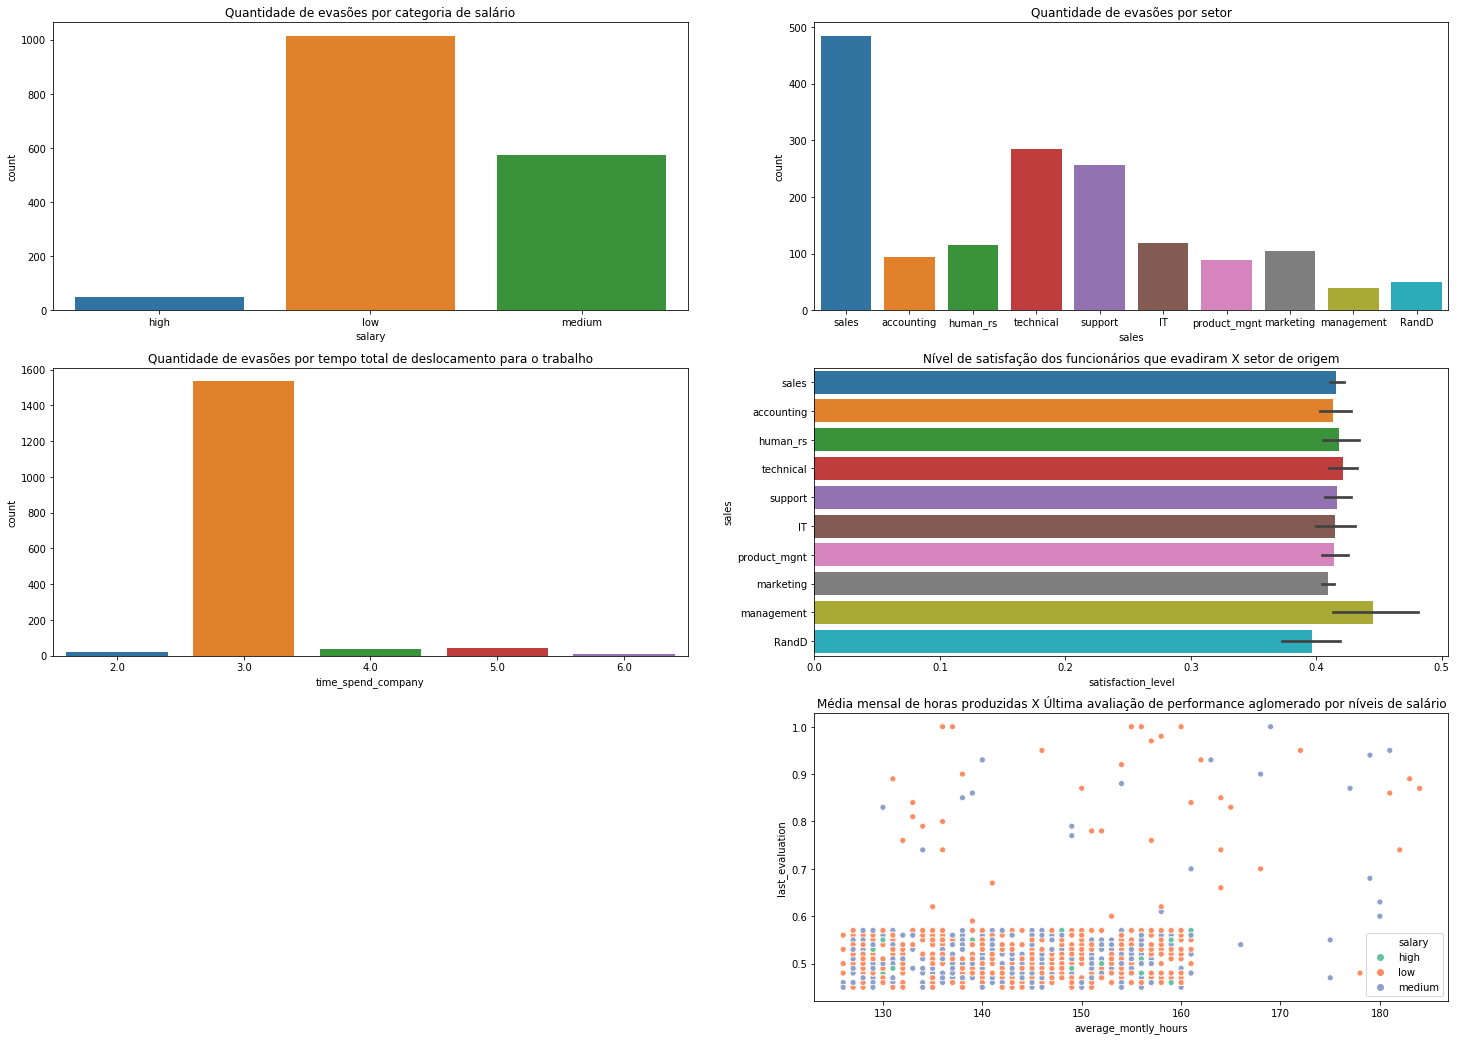

In [610]:
print('Quantidade de evasões por categoria de salário')
print(df_cluster_01.groupby(['salary']).size())

fig = plt.figure()
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,6)

fig.set_figheight(18)
fig.set_figwidth(25)

sns.countplot(data=df_cluster_01, x='salary', ax=ax1)
sns.countplot(data=df_cluster_01, x='sales', ax=ax2)
sns.countplot(data=df_cluster_01, x='time_spend_company', ax=ax3)
sns.barplot(data=df_cluster_01, x='satisfaction_level', y='sales', orient='h', ax=ax4)
sns.scatterplot(data=df_cluster_01, x='average_montly_hours',y='last_evaluation', hue='salary', palette='Set2', ax=ax5) # 'cubehelix', Set2', 'Paired'

ax1.set_title(label='Quantidade de evasões por categoria de salário')
ax2.set_title(label='Quantidade de evasões por setor')
ax3.set_title(label='Quantidade de evasões por tempo total de deslocamento para o trabalho')
ax4.set_title(label='Nível de satisfação dos funcionários que evadiram X setor de origem')
ax5.set_title(label='Média mensal de horas produzidas X Última avaliação de performance aglomerado por níveis de salário')

plt.show()

##### --->>> CLUSTER 02 <<<---

In [611]:
print('---> Sumário do CLUSTER 02 <---')
df_cluster_02.describe()

---> Sumário do CLUSTER 02 <---


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,514.000000,514.000000,514.000000,514.000000,514.000000
mean,0.135409,0.856440,6.060311,293.237354,4.105058
std,0.127826,0.090239,0.948098,10.148896,0.480267
min,0.090000,0.480000,2.000000,277.000000,2.000000
25%,0.100000,0.810000,6.000000,284.250000,4.000000
50%,0.100000,0.870000,6.000000,293.000000,4.000000
75%,0.110000,0.927500,7.000000,302.000000,4.000000
max,0.920000,1.000000,7.000000,310.000000,6.000000


In [612]:
salary = df_cluster_02.groupby('salary')
salary.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
salary,,,,,
high,0.098462,0.862308,6.153846,289.769231,4.076923
low,0.135737,0.853333,6.118590,293.397436,4.089744
medium,0.137407,0.861164,5.957672,293.211640,4.132275


Quantidade de evasões por categoria de salário
salary
high       13
low       312
medium    189
dtype: int64


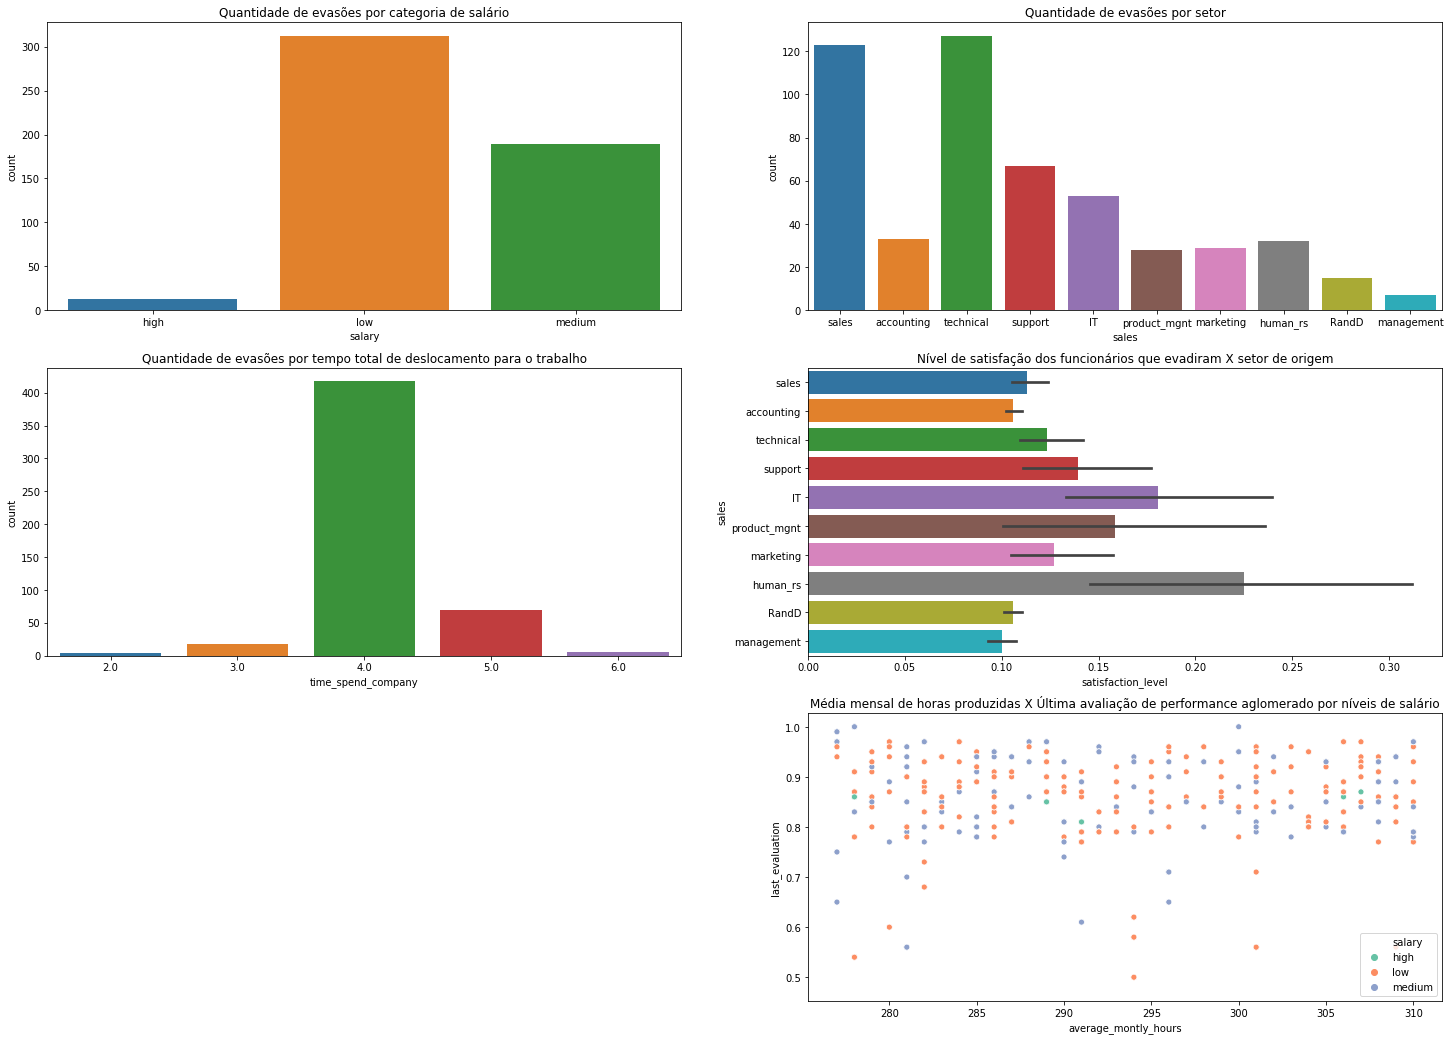

In [613]:
print('Quantidade de evasões por categoria de salário')
print(df_cluster_02.groupby(['salary']).size())

fig = plt.figure()
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,6)

fig.set_figheight(18)
fig.set_figwidth(25)

sns.countplot(data=df_cluster_02, x='salary', ax=ax1)
sns.countplot(data=df_cluster_02, x='sales', ax=ax2)
sns.countplot(data=df_cluster_02, x='time_spend_company', ax=ax3)
sns.barplot(data=df_cluster_02, x='satisfaction_level', y='sales', orient='h', ax=ax4)
sns.scatterplot(data=df_cluster_02, x='average_montly_hours',y='last_evaluation', hue='salary', palette='Set2', ax=ax5) # 'cubehelix', Set2', 'Paired'

ax1.set_title(label='Quantidade de evasões por categoria de salário')
ax2.set_title(label='Quantidade de evasões por setor')
ax3.set_title(label='Quantidade de evasões por tempo total de deslocamento para o trabalho')
ax4.set_title(label='Nível de satisfação dos funcionários que evadiram X setor de origem')
ax5.set_title(label='Média mensal de horas produzidas X Última avaliação de performance aglomerado por níveis de salário')

plt.show()

##### --->>> CLUSTER 03 <<<---

In [614]:
print('---> Sumário do CLUSTER 03 <---')
df_cluster_03.describe()

---> Sumário do CLUSTER 03 <---


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,558.000000,558.000000,558.000000,558.000000,558.000000
mean,0.704014,0.890717,4.731183,230.709677,4.874552
std,0.241106,0.113365,0.861794,12.184029,0.855040
min,0.090000,0.450000,2.000000,188.000000,2.000000
25%,0.730000,0.850000,4.000000,223.000000,5.000000
50%,0.790000,0.915000,5.000000,233.000000,5.000000
75%,0.850000,0.970000,5.000000,241.000000,5.000000
max,0.920000,1.000000,7.000000,245.000000,6.000000


In [615]:
salary = df_cluster_03.groupby('salary')
salary.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
salary,,,,,
high,0.661667,0.898333,5.166667,233.500000,4.833333
low,0.715296,0.895710,4.745562,230.923077,4.902367
medium,0.687383,0.882617,4.696262,230.294393,4.831776


Quantidade de evasões por categoria de salário
salary
high        6
low       338
medium    214
dtype: int64


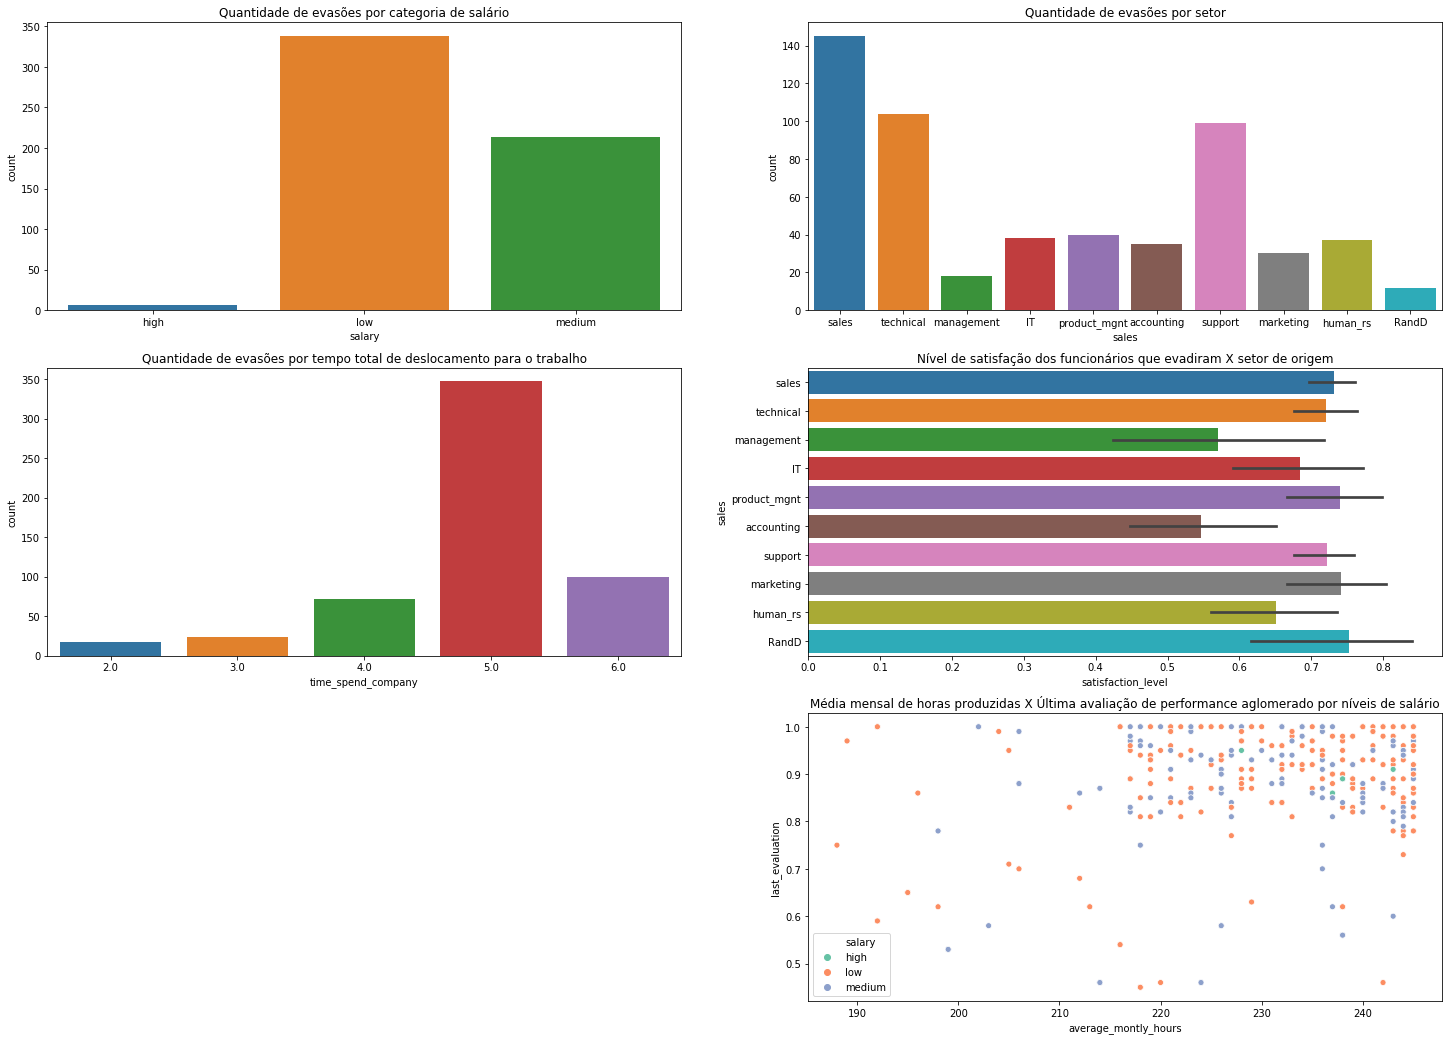

In [616]:
print('Quantidade de evasões por categoria de salário')
print(df_cluster_03.groupby(['salary']).size())

fig = plt.figure()
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,6)

fig.set_figheight(18)
fig.set_figwidth(25)

sns.countplot(data=df_cluster_03, x='salary', ax=ax1)
sns.countplot(data=df_cluster_03, x='sales', ax=ax2)
sns.countplot(data=df_cluster_03, x='time_spend_company', ax=ax3)
sns.barplot(data=df_cluster_03, x='satisfaction_level', y='sales', orient='h', ax=ax4)
sns.scatterplot(data=df_cluster_03, x='average_montly_hours',y='last_evaluation', hue='salary', palette='Set2', ax=ax5) # 'cubehelix', Set2', 'Paired'

ax1.set_title(label='Quantidade de evasões por categoria de salário')
ax2.set_title(label='Quantidade de evasões por setor')
ax3.set_title(label='Quantidade de evasões por tempo total de deslocamento para o trabalho')
ax4.set_title(label='Nível de satisfação dos funcionários que evadiram X setor de origem')
ax5.set_title(label='Média mensal de horas produzidas X Última avaliação de performance aglomerado por níveis de salário')

plt.show()

## 6. PONTOS DE MELHORIA

Desenvolver a análise de agrupamento com outros algoritmos de categorias diferentes do KMEANS (exclusivo):

- Hierarquico
- Sobrepostos
- Probabilísticos